**Introduction**

**Titanic disaster survivals dataset**
> *On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

**Mission**

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Work plan**
* Analyze and explore data
* Building a Machine Learning Model

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data visualization

In [3]:
#lets look at how many entries are there
df.shape

(891, 12)

#### This dataset contain Numerical and Categorical data. So lets separate them into numerical and categorical. It's easy to us work with further

* Numerical
    1. Age
    2. SibSp
    3. Parch
    4. Fare
    
* Categorical
    1. Pclass
    2. Sex
    3. Ticket
    4. Embarked
    5. Cabin

In [4]:
#separate these data into numerical and categorical 
numerical = df[['Age','SibSp','Parch','Fare']]
categorical = df[['Pclass','Sex','Ticket','Embarked','Cabin']]

**First look at the numerical data visualization**

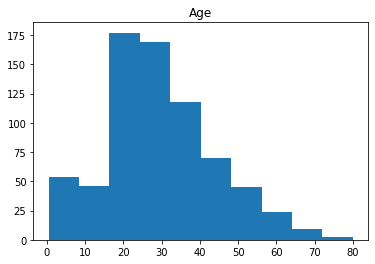

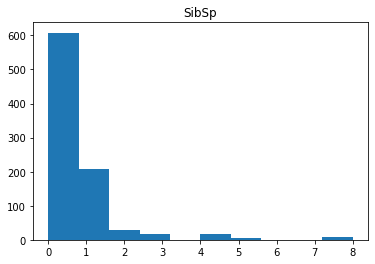

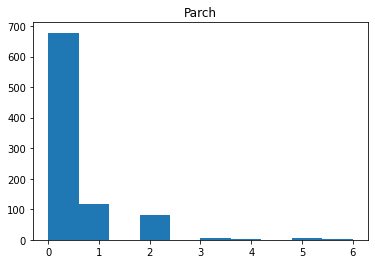

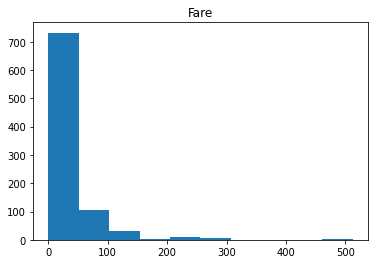

In [5]:
#Numerical data visualization
for a in numerical.columns:
    plt.hist(numerical[a])
    plt.title(a)
    plt.show()

So lets look at the survival rate with above values

In [6]:
#Lets look relationship between survival and numerical values
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


**Ok we saw relationship between numerical data. Lets look at the categorical data visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


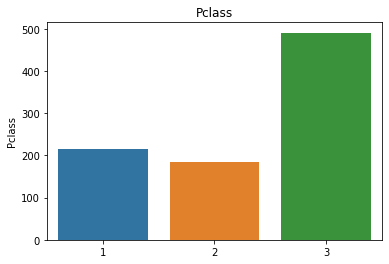

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


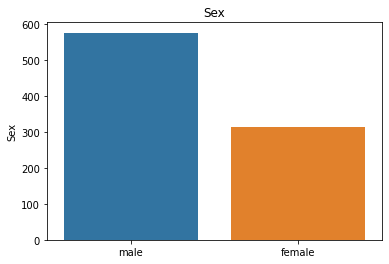

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


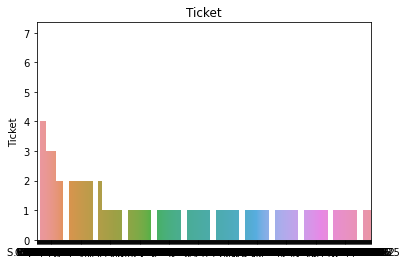

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


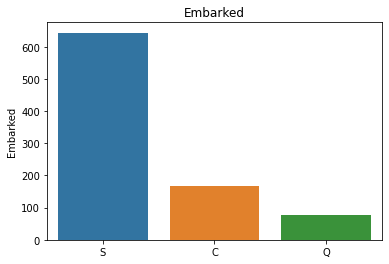

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


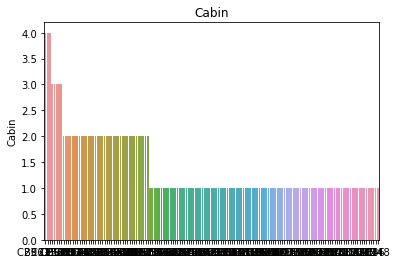

In [7]:
#Categorical data visualization
for a in categorical.columns:
    sn.barplot(categorical[a].value_counts().index,categorical[a].value_counts()).set_title(a)
    plt.show()

Survived rate with categorical data

In [8]:
#Lets look relationship between survival and categorical values
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' , aggfunc ='count'))
print('--------------------')
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('--------------------')
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------
Sex       female  male
Survived              
0             81   468
1            233   109
--------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

Lets look at some information about our dataframe

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning

**Ok according to above chart. There are some outliers. look max value and min value of fare. I think that is a outliers. If I train my model with this outliers, It will be a problem.**
* **So first remove this outliers**

In [10]:
def outliers_remove(df):
    outliers_list = ['Age','SibSp','Parch','Fare']
    for entry in outliers_list:
        max_limit = df[entry].mean() + 4*df[entry].std()
        min_limit = df[entry].mean() - 4*df[entry].std()
        df = df[(df[entry]<max_limit) & (df[entry]>min_limit)]
    return df

In [11]:
df = outliers_remove(df)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,450.802612,0.407837,2.240929,29.683846,0.465893,0.345428,29.959476
std,258.614205,0.491790,0.831787,14.533712,0.841725,0.662303,36.023646
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.000000,0.000000,1.000000,20.500000,0.000000,0.000000,8.050000
50%,448.000000,0.000000,2.000000,28.000000,0.000000,0.000000,14.500000
75%,678.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,4.000000,3.000000,227.525000


*** I used 4 standrad Deviation to remove these outliers.***

In [12]:
df.shape

(689, 12)

**I think I lost about 202 entries from outliers removal (891-689)**

**Lets look unique values in each column and is there any invalid entirs?**

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print('Survived :',df.Survived.unique())
print('Pclass :',df.Pclass.unique())
print('Sex :',df.Sex.unique())
print('SibSp :',df.SibSp.unique())
print('Parch :',df.Parch.unique())
print('Cabin :',df.Cabin.unique())
print('Embarked :',df.Embarked.unique())

Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
SibSp : [1 0 3 4 2]
Parch : [0 1 2 3]
Cabin : [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'D33' 'B30' 'B28' 'C83'
 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'E101' 'D47' 'B86' 'F2'
 'C2' 'B19' 'A7' 'C49' 'F4' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35'
 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'B49' 'D' 'C22 C26'
 'C65' 'E36' 'C54' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40' 'T' 'E33'
 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'C52' 'E44' 'A34' 'C104' 'C111'
 'C92' 'E38' 'E12' 'E63' 'B37' 'C30' 'D20' 'B79' 'E25' 'D46' 'B73' 'B38'
 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19'
 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'B71' 'D49' 'B5' 'B20' 'F G63'
 'C62 C64' 'E24' 'C90' 'C126' 'C45' 'E8' 'C46' 'D30' 'E121' 'D11' 'E77'
 'B3' 'D6' 'B82 B84' 'D17' 'A36' 'B69' 'E49' 'D28' 'E17' 'A24'
 'B51 B53 B55' 'C50' 'B42' 'C148']
Embarked : ['S' 'C' 'Q' nan]


**There are some NaN values. Lets look at how much**

In [15]:
#Lets look how many NaN values are there
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          514
Embarked         2
dtype: int64

* There are 687 NaN Cabin entries out of 891. So we can ignore that column
* Also drop 2 embarked entries
* And we can fill other NaN values with there mean

In [16]:
#There are 687 NaN Cabin entries out of 891. So we can ignore that column
#Also drop 2 embarked entries
#And we can fill other NaN values with there mean
def fix_nan_values(df):
    df.drop('Cabin',axis='columns',inplace=True)
    df.Age.fillna(df.Age.mean(),inplace=True)
    df.Fare.fillna(df.Fare.mean(),inplace=True)
    df.dropna(subset=['Embarked'],inplace=True)
    return df


In [17]:
fix_nan_values(df)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**So there isn't any NaN values further. Lets apply dummies for categorical variables.**

> ***Every time wrotes functions because it helpful when do same process to test data set.***

In [18]:
def apply_dummies(df):
    dummies=pd.get_dummies(df.Sex)
    df1 = pd.concat([df,dummies.drop(['female'],axis='columns')],axis='columns')
    df1.drop('Sex',axis='columns',inplace=True)
    dummies=pd.get_dummies(df1.Embarked)
    df2 = pd.concat([df1,dummies.drop(['Q'],axis='columns')],axis='columns')
    df2.drop('Embarked', axis='columns',inplace=True)
    return df2

In [19]:
df = apply_dummies(df)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,C,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


*** Name and Ticket columns are no need. It looks there isn't any relationship between servival rate and that Name/Ticket columns. I don't know exactly but I think so. ***

**Therefore I drop these columns**

In [20]:
#Name and Ticket column is no need. So drop them
def drop_columns(df):
    df.drop('Name',axis='columns',inplace=True)
    df.drop('Ticket',axis='columns',inplace=True)
    return df
    

In [21]:
drop_columns(df)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Now our dataset is looking good. Let's apply a scaller for Age and Fare data columns**

I  use StandardScaller

In [22]:
def scale_data(df):
    scaler = StandardScaler()
    df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
    df.head()
    return df

In [23]:
scale_data(df)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,S
0,1,0,3,-0.526265,1,0,-0.627673,1,0,1
1,2,1,1,0.578072,1,0,1.153587,0,1,0
2,3,1,3,-0.250181,0,0,-0.608896,0,0,1
3,4,1,1,0.371009,1,0,0.647769,0,0,1
4,5,0,3,0.371009,0,0,-0.605419,1,0,1


# Model Training 

**Now we can take this data to train our model**

**Split data into x train and y train**

In [24]:
X_train, y_train = df.drop(['Survived','PassengerId'],axis='columns'),df['Survived']
X_train.shape, y_train.shape

((687, 8), (687,))

**Then load test data and apply that previous data cleaning and scalling functions**

In [25]:
test_data = pd.read_csv('test.csv')
fix_nan_values(test_data)
test_data = apply_dummies(test_data)
drop_columns(test_data)
scale_data(test_data)
test_data.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,S
0,892,3,0.334993,0,0,-0.498407,1,0,0
1,893,3,1.325530,1,0,-0.513274,0,0,1
2,894,2,2.514175,0,0,-0.465088,1,0,0
3,895,3,-0.259330,0,0,-0.483466,1,0,1
4,896,3,-0.655545,1,1,-0.418471,0,0,1


In [26]:
X_test = test_data.drop('PassengerId',axis='columns')
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,C,S
0,3,0.334993,0,0,-0.498407,1,0,0
1,3,1.325530,1,0,-0.513274,0,0,1
2,2,2.514175,0,0,-0.465088,1,0,0
3,3,-0.259330,0,0,-0.483466,1,0,1
4,3,-0.655545,1,1,-0.418471,0,0,1


**Lets look how many entries with train and test data**

In [27]:
X_train.shape, X_test.shape, y_train.shape

((687, 8), (418, 8), (687,))

**Lets try to train different models and look their avg scores.**

In [28]:
m_gnb = GaussianNB()
score = cross_val_score(m_gnb,X_train,y_train,cv=5)
print(score.mean())

0.7773405268168835


In [29]:
m_lr = LogisticRegression()
score = cross_val_score(m_lr,X_train,y_train,cv=5)
print(score.mean())

0.7874537183962763


In [30]:
m_rfc = RandomForestClassifier()
score = cross_val_score(m_rfc,X_train,y_train,cv=5)
print(score.mean())

0.778768644874643


In [31]:
m_dt = DecisionTreeClassifier()
score = cross_val_score(m_dt,X_train,y_train,cv=5)
print(score.mean())

0.7540357558447054


In [32]:
m_svc = SVC()
score = cross_val_score(m_svc,X_train,y_train,cv=5)
print(score.mean())

0.8093197926584154


In [33]:
m_knc = KNeighborsClassifier()
score = cross_val_score(m_knc,X_train,y_train,cv=5)
print(score.mean())

0.7948376176875067


## Hyper Parameter Tuning

**Lets try different parameters in different models**

In [34]:
model_param = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'gaussian' :{
        'model' : GaussianNB(),
        'params' : {
            
        }
    },
    'kneighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,7,9],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree','kd_tree']
        }
    },
    'tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
        }
    }
}

In [35]:
scores = []
for model_name, mp in model_param.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
  clf.fit(X_train,y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
best_sc = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_sc

,model,best_score,best_params
0,svc,0.810771,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.794760,"{'criterion': 'gini', 'n_estimators': 10}"
2,logistic_regression,0.784571,{'C': 10}
3,gaussian,0.777293,{}
4,kneighbors,0.788937,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh..."
5,tree,0.764192,{'criterion': 'gini'}


**So SVC model score is looking good. 81% accuracy with training samples**

**Lets try svc model with our test data**

In [36]:
model = SVC(C=1,kernel='rbf')
model.fit(X_train,y_train)
result = model.predict(X_test)
submission = pd.DataFrame({
    "PassengerId" : test_data.PassengerId,
    "Survived" : result
})

**convert submission to csv**

In [37]:
submission.to_csv('submission.csv', index=False)

In [38]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
